In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\dashs\Documents\NLP\Spam SMS Collection.txt", sep='\t', names=['label', 'message'])

# **Exploratory Data Analysis (EDA)**
* Exploring NaN values in dataset
* Plotting countplots for Spam vs. Ham



In [3]:
df.shape

(5572, 2)

In [4]:
df.columns

Index(['label', 'message'], dtype='object')

In [5]:
df.dtypes

label      object
message    object
dtype: object

In [6]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe(include='object')

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


_**Note: No NaN values** in the dataset._

In [10]:
# Mapping values for label
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [11]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [13]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

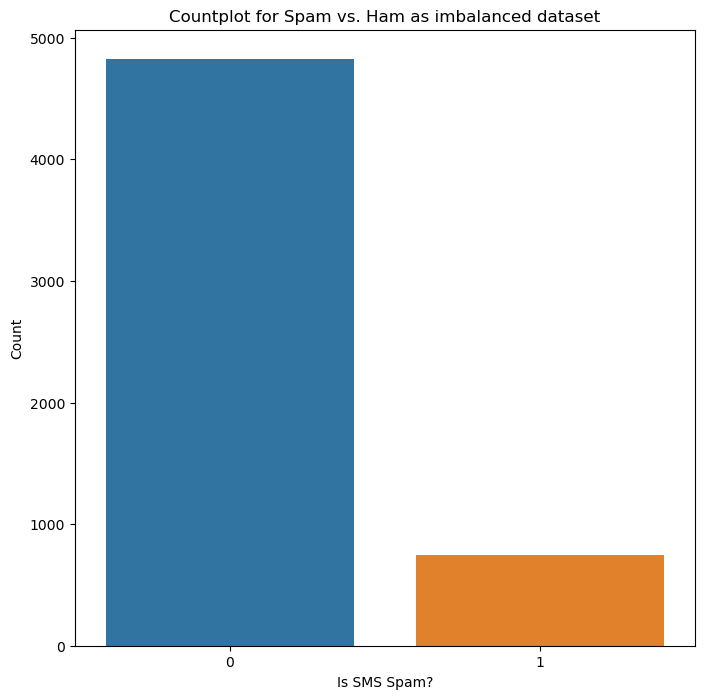

In [14]:
# Countplot for Spam vs. Ham as imbalanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as imbalanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

_**Insight:** From the above countplot, it is evident that the **dataset is imbalanced**._

# **Feature Engineering**
*   Handling imbalanced dataset using Oversampling



In [15]:
# Handling imbalanced dataset using Oversampling
only_spam = df[df['label']==1]
print('Number of Spam records: {}'.format(only_spam.shape[0]))
print('Number of Ham records: {}'.format(df.shape[0]-only_spam.shape[0]))

Number of Spam records: 747
Number of Ham records: 4825


In [16]:
count = int((df.shape[0]-only_spam.shape[0])/only_spam.shape[0])
for i in range(0, count-1):
    df = pd.concat([df, only_spam])

df.shape

(9307, 2)

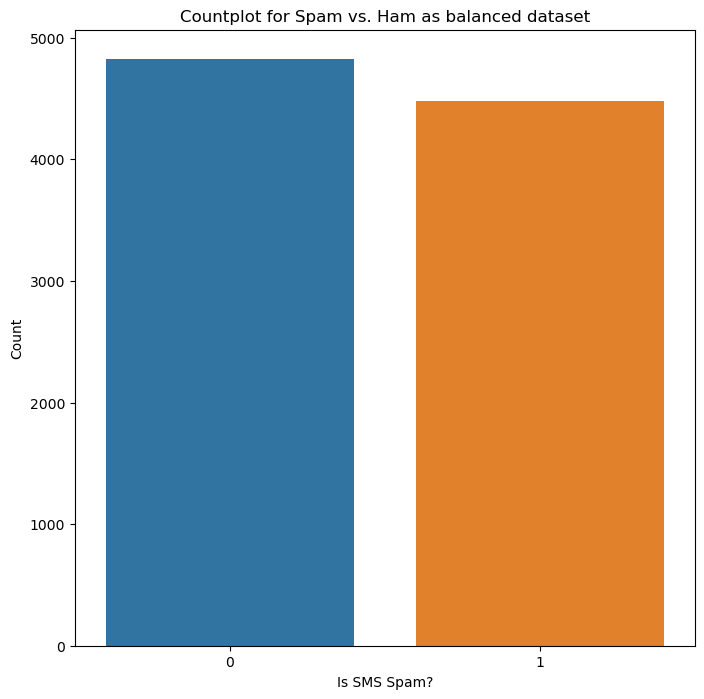

In [17]:
# Countplot for Spam vs. Ham as balanced dataset
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=df)
p = plt.title('Countplot for Spam vs. Ham as balanced dataset')
p = plt.xlabel('Is SMS Spam?')
p = plt.ylabel('Count')

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.message, df.label, random_state = 42)

In [19]:
max_features = 3000
maxlen = 300

In [20]:
from keras.preprocessing import text, sequence

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
x_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [21]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [22]:
EMBEDDING_FILE = r"C:\Users\dashs\Documents\NLP\embeddings_w.csv"

In [23]:
def get_coefs(word, *arr): 
    return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(',')) for o in open(EMBEDDING_FILE))
embeddings_index

{'RESERVED': array([ 0.02915302,  0.0418075 ,  0.04942814,  0.04863943, -0.00866957,
         0.00480203,  0.0065605 ,  0.04673189, -0.03852085,  0.03364541,
         0.01324036,  0.01576335,  0.07682345,  0.00782223, -0.05227484,
        -0.07448635, -0.0679482 , -0.04270561, -0.03721081,  0.02867169,
        -0.02092068,  0.0559247 ,  0.0734643 , -0.02091186, -0.04998185,
        -0.02611379,  0.05233786,  0.0167668 , -0.04137208, -0.048454  ,
         0.04498817,  0.04925038, -0.02872655, -0.00435775, -0.05463618,
        -0.00252961, -0.05526302, -0.05585722, -0.02294222,  0.0092806 ,
         0.04693998, -0.06212785, -0.02896763,  0.0817602 ,  0.00213576,
        -0.08041165, -0.05478201, -0.00504592, -0.00277984,  0.00983341,
        -0.07560524,  0.00960742,  0.03878553,  0.05895338, -0.04080134,
        -0.00651641,  0.0004974 , -0.01491873, -0.01238362, -0.00591751,
         0.0471479 , -0.06350453, -0.03467368, -0.02230295,  0.0613356 ,
         0.09293618,  0.02690454,  0.02

In [25]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
#change below line if computing normal stats is too slow
embedding_matrix = embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
embedding_matrix

C:\Users\dashs\anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if await self.run_code(code, result, async_=asy):


array([[-4.41925844e-03, -2.73485336e-01, -8.78735186e-02, ...,
         3.71979232e-02,  1.69997490e-01,  2.94262454e-02],
       [-3.79532546e-01, -2.43454725e-01,  2.28983849e-01, ...,
         1.43389136e-01,  2.77042568e-01,  5.10544717e-01],
       [-3.60370934e-01, -1.79352000e-01,  2.79131114e-01, ...,
         2.26702504e-02,  3.05886537e-01,  2.52968013e-01],
       ...,
       [-3.36491209e-02,  2.02923605e-01, -1.61175371e-01, ...,
         2.20208618e-01,  2.02027987e-01, -2.34499740e-01],
       [-6.41879273e-02, -2.09059198e-01,  1.19499771e-01, ...,
         1.58514021e-01, -1.50042419e-04,  1.52438872e-01],
       [ 2.32003455e-01,  4.80906946e-02, -2.39365627e-02, ...,
        -1.48045921e-01,  1.68977690e-02, -1.02875657e-01]])

# **Model Building & Evaluation**
_**Metric: Accuracy**_

In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [27]:
batch_size = 256
epochs = 10

In [28]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [29]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=96, weights=[embedding_matrix], input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 96)           288000    
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          115200    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 454,721
Trainable params: 166,721
Non-trainable params: 288,000
_________________________________________________________________


In [32]:
history = model.fit(x_train, y_train, 
                    batch_size = batch_size, 
                    validation_data = (X_test,y_test),
                    epochs = epochs, 
                    callbacks = [learning_rate_reduction])

Epoch 1/10
28/28 [==============================] - 224s 8s/step - loss: 0.3764 - accuracy: 0.8673 - val_loss: 0.1696 - val_accuracy: 0.9493
Epoch 2/10
28/28 [==============================] - 243s 9s/step - loss: 0.1263 - accuracy: 0.9586 - val_loss: 0.1125 - val_accuracy: 0.9549
Epoch 3/10
28/28 [==============================] - 274s 10s/step - loss: 0.1053 - accuracy: 0.9652 - val_loss: 0.0856 - val_accuracy: 0.9738
Epoch 4/10
28/28 [==============================] - 279s 10s/step - loss: 0.0846 - accuracy: 0.9726 - val_loss: 0.0664 - val_accuracy: 0.9772
Epoch 5/10
28/28 [==============================] - 301s 11s/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0481 - val_accuracy: 0.9854
Epoch 6/10
28/28 [==============================] - 325s 12s/step - loss: 0.0518 - accuracy: 0.9834 - val_loss: 0.0360 - val_accuracy: 0.9884
Epoch 7/10
28/28 [==============================] - 319s 11s/step - loss: 0.0380 - accuracy: 0.9858 - val_loss: 0.0250 - val_accuracy: 0.9940
Epoch 8/

In [33]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

219/219 [==============================] - 61s 281ms/step - loss: 0.0081 - accuracy: 0.9976
Accuracy of the model on Training Data is -  99.75644946098328 %
73/73 [==============================] - 28s 390ms/step - loss: 0.0128 - accuracy: 0.9957
Accuracy of the model on Testing Data is -  99.57026243209839 %


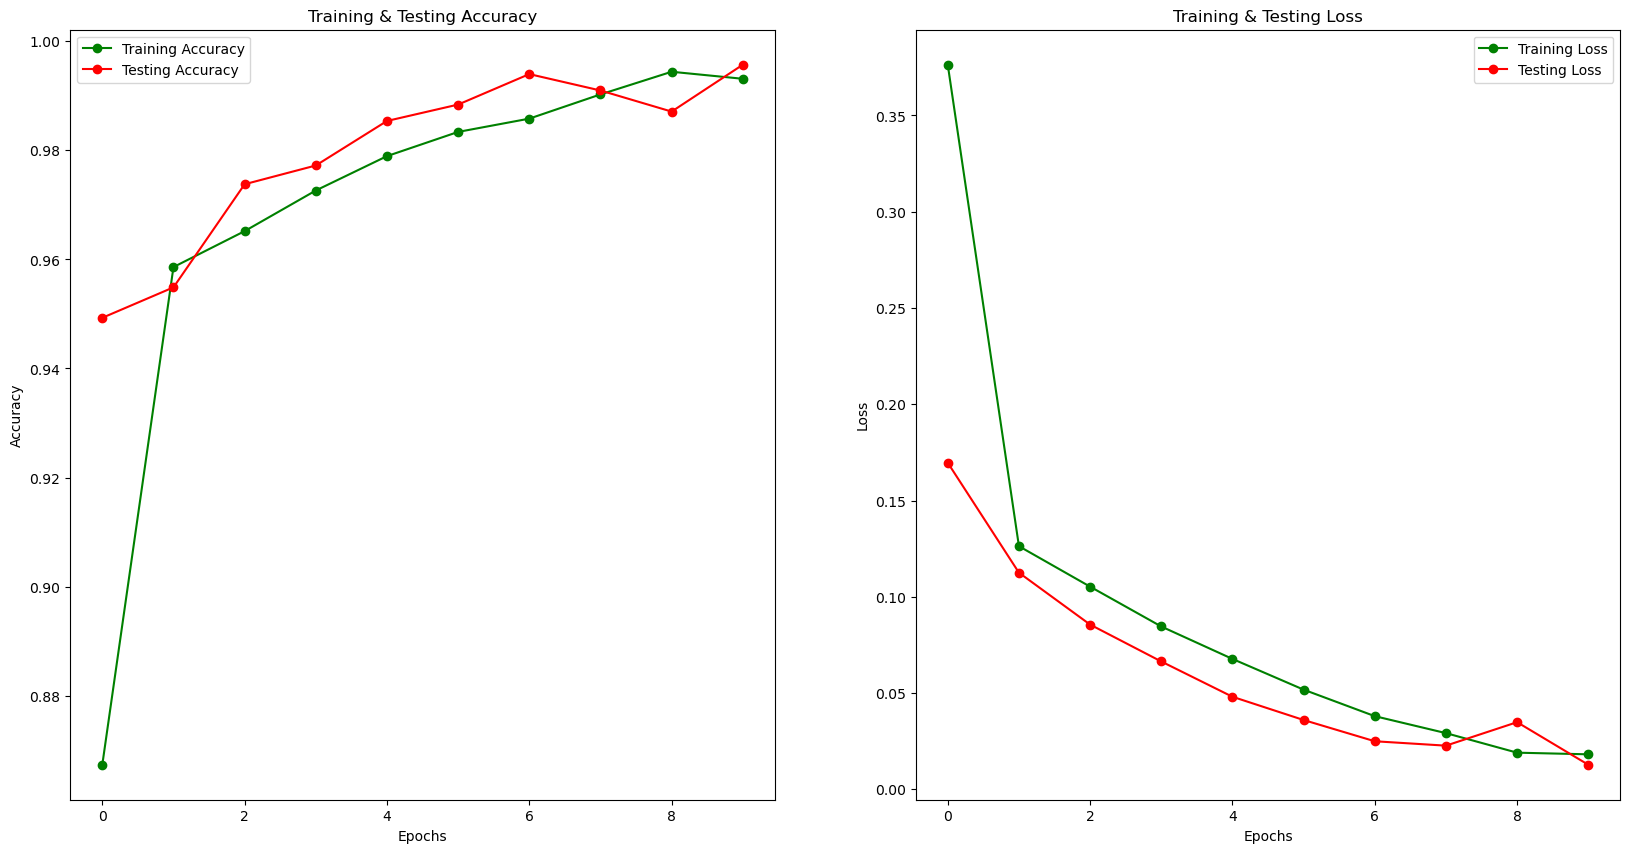

In [34]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [35]:
pred = model.predict_classes(X_test)
pred[:5]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [1],
       [1]])

In [37]:
print(classification_report(y_test, pred, target_names = ['Spam','Ham']))

              precision    recall  f1-score   support

        Spam       1.00      0.99      1.00      1195
         Ham       0.99      1.00      1.00      1132

    accuracy                           1.00      2327
   macro avg       1.00      1.00      1.00      2327
weighted avg       1.00      1.00      1.00      2327



In [38]:
cm = confusion_matrix(y_test,pred)
cm

array([[1185,   10],
       [   0, 1132]], dtype=int64)

In [39]:
cm = pd.DataFrame(cm , index = ['Spam','Ham'] , columns = ['Spam','Ham'])

Text(95.72222222222221, 0.5, 'Actual')

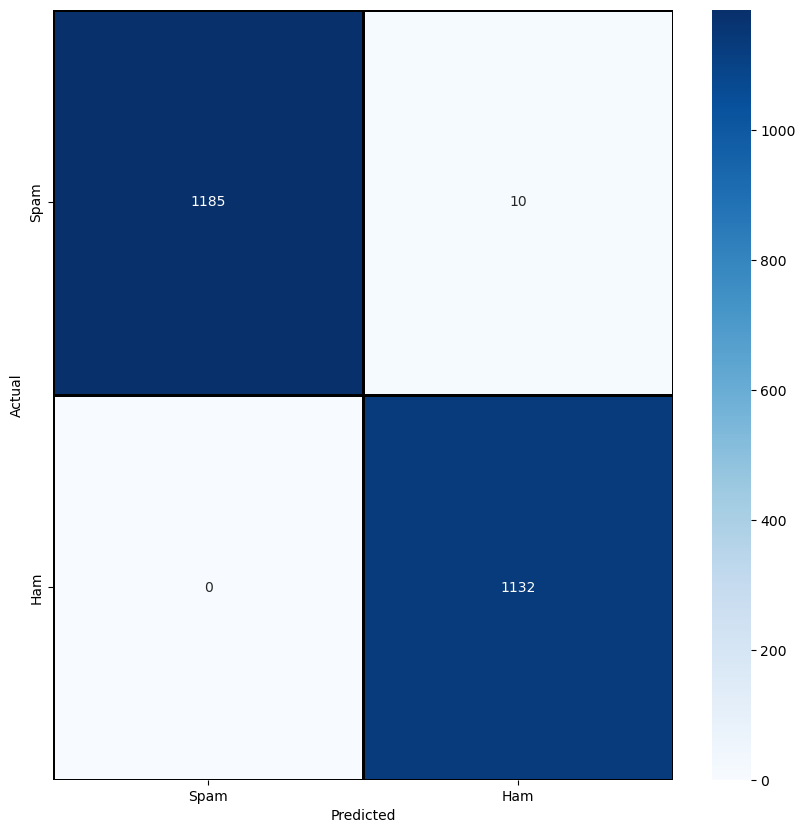

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Spam','Ham'] , yticklabels = ['Spam','Ham'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [42]:
model.save('classifier_model1.h5')